## OIL & GAS STOCK PRICE PREDICTIONS 

## IMPORT LIBRARIES

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import math
import os

plt.style.use("seaborn-dark-palette")

In [57]:
df= pd.read_csv('/content/oil and gas stock prices.csv')

# DATA PREPROCESSING

In [58]:
df

,Date,Symbol,Open,High,Low,Close,Volume,Currency
0,2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200,USD
1,2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800,USD
2,2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000,USD
3,2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000,USD
4,2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800,USD
...,...,...,...,...,...,...,...,...
39196,2022-06-06,SLB,47.79,48.00,46.88,47.22,6696970,USD
39197,2022-06-07,SLB,47.00,49.08,46.87,48.93,14692203,USD
39198,2022-06-08,SLB,49.00,49.83,48.08,49.57,15067131,USD
39199,2022-06-09,SLB,48.79,49.16,48.10,48.14,11447491,USD


In [59]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Currency
0,2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200,USD
1,2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800,USD
2,2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000,USD
3,2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000,USD
4,2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800,USD


In [60]:
df.tail()

,Date,Symbol,Open,High,Low,Close,Volume,Currency
39196,2022-06-06,SLB,47.79,48.00,46.88,47.22,6696970,USD
39197,2022-06-07,SLB,47.00,49.08,46.87,48.93,14692203,USD
39198,2022-06-08,SLB,49.00,49.83,48.08,49.57,15067131,USD
39199,2022-06-09,SLB,48.79,49.16,48.10,48.14,11447491,USD
39200,2022-06-10,SLB,47.17,47.88,46.52,47.21,11291267,USD


In [61]:
df.sample()

,Date,Symbol,Open,High,Low,Close,Volume,Currency
4679,2018-08-08,XOM,81.02,81.23,80.35,80.73,7275062,USD


In [62]:
df.shape

(39201, 8)

In [63]:
df.describe().style.background_gradient(cmap = "cividis")

,Open,High,Low,Close,Volume
count,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000
mean,54.364067,55.001009,53.705220,54.362596,9352226.464708
std,30.245985,30.496050,29.999024,30.257341,7496890.046661
min,3.220000,3.290000,3.020000,3.120000,95700.000000
25%,30.230000,30.730000,29.750000,30.200000,4866770.000000
50%,52.320000,53.050000,51.620000,52.320000,7446208.000000
75%,77.170000,78.030000,76.310000,77.170000,11370000.000000
max,180.950000,182.400000,180.250000,181.130000,273996608.000000


In [64]:
df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39201 entries, 0 to 39200
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      39201 non-null  object 
 1   Symbol    39201 non-null  object 
 2   Open      39201 non-null  float64
 3   High      39201 non-null  float64
 4   Low       39201 non-null  float64
 5   Close     39201 non-null  float64
 6   Volume    39201 non-null  int64  
 7   Currency  39201 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.4+ MB


In [66]:
df.isna().sum()

Date        0
Symbol      0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [67]:
df.isnull().sum()

Date        0
Symbol      0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999765,0.999726,0.999509,0.000992
High,0.999765,1.000000,0.999610,0.999745,0.004501
Low,0.999726,0.999610,1.000000,0.999751,-0.003180
Close,0.999509,0.999745,0.999751,1.000000,0.000824
Volume,0.000992,0.004501,-0.003180,0.000824,1.000000


In [70]:
df.index

RangeIndex(start=0, stop=39201, step=1)

In [71]:
df.tail()

,Date,Symbol,Open,High,Low,Close,Volume,Currency
39196,2022-06-06,SLB,47.79,48.00,46.88,47.22,6696970,USD
39197,2022-06-07,SLB,47.00,49.08,46.87,48.93,14692203,USD
39198,2022-06-08,SLB,49.00,49.83,48.08,49.57,15067131,USD
39199,2022-06-09,SLB,48.79,49.16,48.10,48.14,11447491,USD
39200,2022-06-10,SLB,47.17,47.88,46.52,47.21,11291267,USD


In [74]:
df. columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [79]:
df.drop(columns=['Currency'], inplace=True)

## DATA VISUALISZATIONS

# Company (Symbol) in Dataset:

*   Exxon Mobil Corporation (XOM)
*   Chevron Corporation (CVX)
*   ConocoPhillips (COP)
*   Marathon Petroleum Corporation (MPC)
*   Phillips 66 (PSX)
*  Valero Energy Corporation (VLO)
*   Marathon Oil Corporation (MRO)
*  Schlumberger Limited (SLB)






















In [75]:
  for y in ["Open", "High", "Volume"]: 
    fig = px.histogram(df, x = "Date", y = y, color = "Symbol",
                       color_discrete_sequence = px.colors.qualitative.Set2,
                       title = f"Total Trading {y} Distribution of Major US Oil Companies")
    
    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 18))
    fig.show()

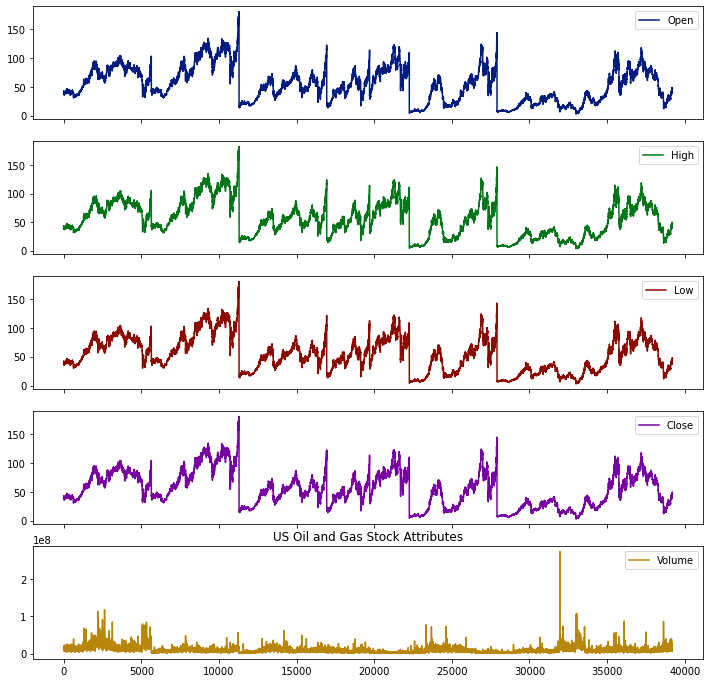

In [76]:
# Visualize each atrribute
df.plot(subplots = True, figsize = (12,12), linewidth = 1.5)
plt.title("US Oil and Gas Stock Attributes")
plt.show()

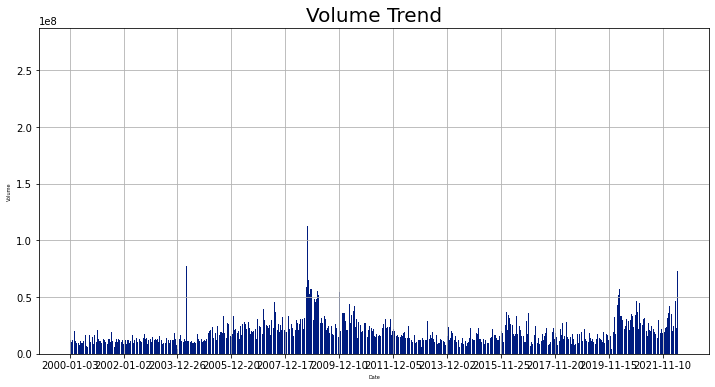

In [77]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(df["Date"], df["Volume"])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("Date", fontsize = 5)
ax.set_ylabel("Volume", fontsize = 5)
plt.title('Volume Trend', fontsize = 20)
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Maximum open price of stock ever obtained: 180.95
Minimum open price of stock ever obtained: 3.22


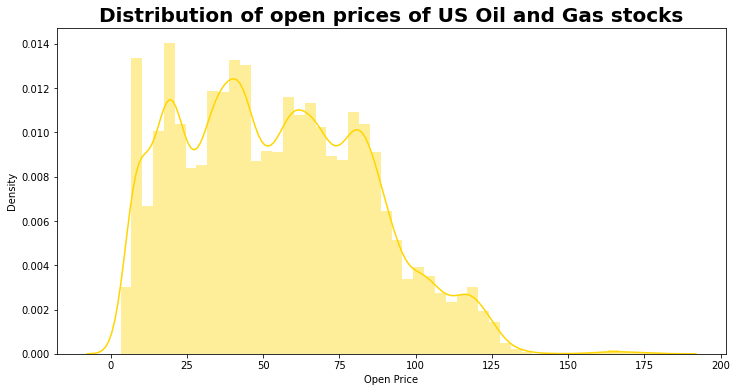

In [78]:
plt.figure(figsize = (12, 6))
sns.distplot(df["Open"], color= "#FFD500")
plt.title("Distribution of open prices of US Oil and Gas stocks", fontweight = "bold", fontsize = 20)
plt.xlabel("Open Price", fontsize = 10)

print("Maximum open price of stock ever obtained:", df["Open"].max())
print("Minimum open price of stock ever obtained:", df["Open"].min())

In [82]:
df.set_index('Date', inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200
2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800
2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000
2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000
2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800


In [85]:
df.sort_values(by='High',ascending= False).head(5)
df['High']

Date
2000-01-03    40.38
2000-01-04    39.09
2000-01-05    40.88
2000-01-06    42.91
2000-01-07    43.12
              ...  
2022-06-06    48.00
2022-06-07    49.08
2022-06-08    49.83
2022-06-09    49.16
2022-06-10    47.88
Name: High, Length: 39201, dtype: float64

In [86]:
df.sort_values(by='Low',ascending= False).head(5)
df['Low']

Date
2000-01-03    38.94
2000-01-04    38.25
2000-01-05    38.91
2000-01-06    40.09
2000-01-07    42.00
              ...  
2022-06-06    46.88
2022-06-07    46.87
2022-06-08    48.08
2022-06-09    48.10
2022-06-10    46.52
Name: Low, Length: 39201, dtype: float64

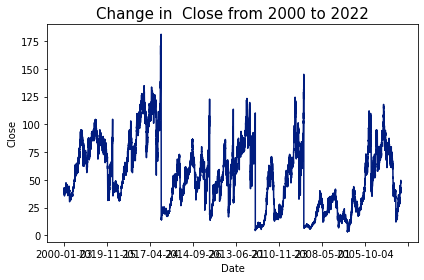

In [83]:
df['Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Close',fontsize= 10)
plt.title('Change in  Close from 2000 to 2022',fontsize= 15)
plt.tight_layout()

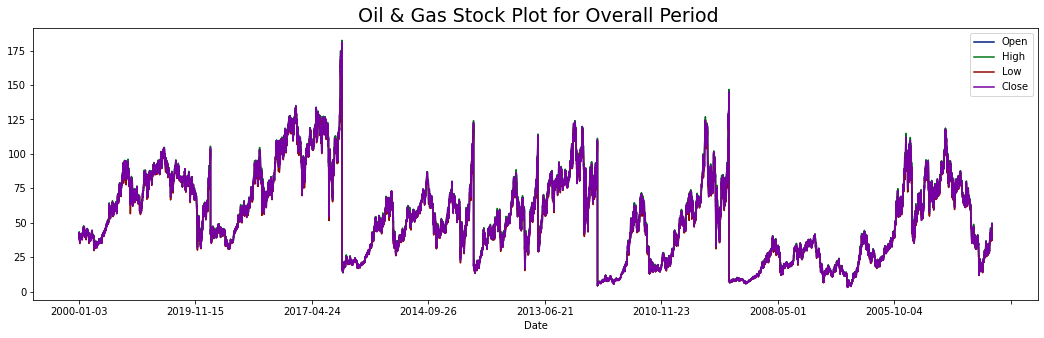

In [84]:
df[['Open', 'High','Low','Close']].plot(figsize=(18,5))
plt.title(" Oil & Gas Stock Plot for Overall Period", fontsize=19)
plt.show()

# TRAIN TEST SPLIT 

In [92]:
from sklearn.model_selection import train_test_split


In [93]:
x =df[['Open', 'High', 'Low','Volume']].values
y = df[['Close']].values

In [94]:
x


array([[3.9750000e+01, 4.0380000e+01, 3.8940000e+01, 1.3458200e+07],
       [3.8690000e+01, 3.9090000e+01, 3.8250000e+01, 1.4510800e+07],
       [3.9000000e+01, 4.0880000e+01, 3.8910000e+01, 1.7485000e+07],
       ...,
       [4.9000000e+01, 4.9830000e+01, 4.8080000e+01, 1.5067131e+07],
       [4.8790000e+01, 4.9160000e+01, 4.8100000e+01, 1.1447491e+07],
       [4.7170000e+01, 4.7880000e+01, 4.6520000e+01, 1.1291267e+07]])

In [95]:
y

array([[39.16],
       [38.41],
       [40.5 ],
       ...,
       [49.57],
       [48.14],
       [47.21]])

In [96]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=0)


# PREDICTIONS


## Method : Linear Regression


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [98]:
model =  LinearRegression()

model.fit(x_train,y_train)

print(model.coef_)

[[-5.76173693e-01  8.08212712e-01  7.67891570e-01  7.62016894e-10]]


Predict the Model


In [99]:
Lr_pred= model.predict(x_test)
print(Lr_pred)

[[  8.65716503]
 [127.15364031]
 [ 17.50412051]
 ...
 [ 68.53007534]
 [ 67.90385548]
 [112.04579162]]


Comparing Actual and Predicted Value



In [100]:
Lin_reg = pd.DataFrame({"Actual":y_test.flatten(),"Prediction":Lr_pred.flatten()})
Lin_reg.head()

,Actual,Prediction
0,8.70,8.657165
1,127.49,127.153640
2,17.40,17.504121
3,40.21,40.267385
4,75.74,76.339368


<AxesSubplot:>

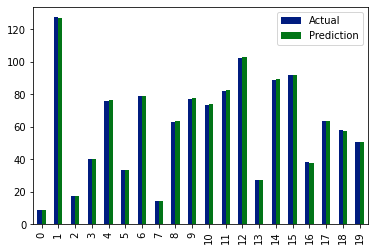

In [101]:
graph = Lin_reg.head(20)
graph.plot(kind='bar')

In [102]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,Lr_pred))

Mean Squared Error: 0.18964828357475516


In [103]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,Lr_pred))

Mean Absolute Error: 0.2882751041051919


In [104]:
import math
from sklearn.metrics import mean_squared_error
Root_mean_squared_error = math.sqrt(mean_squared_error(y_test, Lr_pred))
print(Root_mean_squared_error)

0.4354862610631421


Accuuracy Of The Model


In [106]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,Lr_pred))##Goodness of fit test

R2 score:  0.9997951381259566


**Here**, **Our** **Fitted** **Model** **is** **Good** **Model**


## Method: DecisionTree Regression


In [107]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [108]:
model =  DecisionTreeRegressor()

model.fit(x_train,y_train)

print(model)

DecisionTreeRegressor()


In [109]:
dt_pred = model.predict(x_test)
print(dt_pred)

[  8.69 127.63  17.44 ...  69.11  68.04 112.5 ]


## Comparing Actual and Predicted Value


In [112]:
og_stocks= pd.DataFrame({"Actual":y_test.flatten(),"Prediction":dt_pred.flatten()})
og_stocks.head()

,Actual,Prediction
0,8.70,8.69
1,127.49,127.63
2,17.40,17.44
3,40.21,39.70
4,75.74,76.02


<AxesSubplot:>

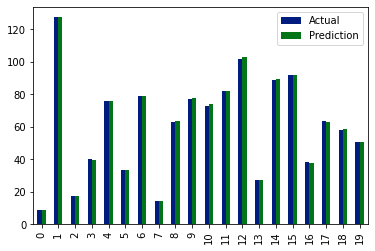

In [113]:
graph = og_stocks.head(20)
graph.plot(kind='bar')

In [114]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,dt_pred))

Mean Squared Error: 0.4401349062619562


In [115]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,dt_pred))

Mean Absolute Error: 0.4091620966713429


In [116]:
import math
from sklearn.metrics import mean_squared_error
Root_mean_squared_error = math.sqrt(mean_squared_error(y_test, dt_pred))
print(Root_mean_squared_error)

0.6634266396987358


## Predict the Model

In [117]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,dt_pred))##Goodness of fit test

R2 score:  0.9995245574595817


**Here**, **Our** **Fitted** **Model** **is** **Good** **Model**

### Method : Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [119]:
model =  RandomForestRegressor()

model.fit(x_train,y_train)

print(model)

<ipython-input-119-df8d8dbe8406>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()


In [120]:
rf_pred = model.predict(x_test)
print(rf_pred)

[  8.6757 127.2825  17.4988 ...  68.7881  67.8506 112.254 ]


## Comparing Actual and Predicted Values

In [121]:
o_g_Stocks1 = pd.DataFrame({"Actual":y_test.flatten(),"Prediction":rf_pred.flatten()})
o_g_Stocks1.head()

,Actual,Prediction
0,8.70,8.6757
1,127.49,127.2825
2,17.40,17.4988
3,40.21,40.1092
4,75.74,76.1852


<AxesSubplot:>

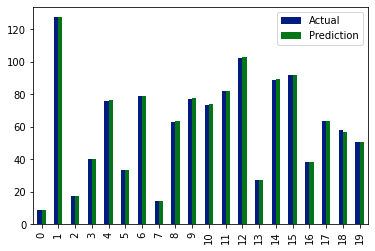

In [122]:
graph = o_g_Stocks1.head(20)
graph.plot(kind='bar')

In [123]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(y_test,rf_pred))

Mean Squared Error: 0.2386436611452615


In [124]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,rf_pred))

Mean Absolute Error: 0.3155075373039156


In [126]:
import math
from sklearn.metrics import mean_squared_error
Root_mean_squared_error = math.sqrt(mean_squared_error(y_test, rf_pred))
print(Root_mean_squared_error)

0.48851167964058084


## Accuracy of the Model


In [127]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,rf_pred))##Goodness of fit test

R2 score:  0.9997422123378642


**Here**, **Our** **Fitted** **Model** **is** **Good** **Model**

# **CONCLUSION**

Here the analysis of the dataset "OIL & GAS_Stock_Price" was done.The dataset was downloaded from kaggle which consists of Everyday price,Price at which stock opened,Today's High,Today's Low price adjusted for splits, close price adjusted for splits and dividend and/or capital gain distributions,Volume of Stocks etc.The attempt was to use various regression models to predict the price of the stocks.Here R2 score (coefficient of Determination) and Mean Squared Error(MSE)are used to evaluate and compare the performance of regressors. The following Results are




1.   Linear Regression: R2 Score: 0.9997951381259566, MSE:0.18964828357475516

2.   DecisionTree Regression: R2 Score: 0.9995245574595817, MSE:0.2386436611452615



1.   RandomForest Regression: R2 Score: 0.9997422123378642, MSE:0.2386436611452615



## Looking at the above results, it can be concluded that Linear Regression Model is recommended as it will give a better Performance compared to other models
